===================================# VIEWING AND INSPECTING DATA =================================== 

---------- # FIRST 5 ROWS # -----------
   id                               Movie Name Release Date  \
0  1     Star Wars Ep. VII: The Force Awakens   2015-12-16   
1  2                 Avatar: The Way of Water   2022-12-09   
2  3    Indiana Jones and the Dial of Destiny   2023-06-28   
3  4                        Avengers: Endgame   2019-04-23   
4  5  Mission: Impossible—The Final Reckoning   2025-05-21   

   Production Budget (USD)  Domestic Gross (USD)  Worldwide Gross (USD)  \
0                533200000             936662225             2056046835   
1                460000000             684075767             2315589775   
2                402300000             174480468              383963057   
3                400000000             858373000             2748242781   
4                400000000                     0                      0   

   Domestic Box Office (USD)  In

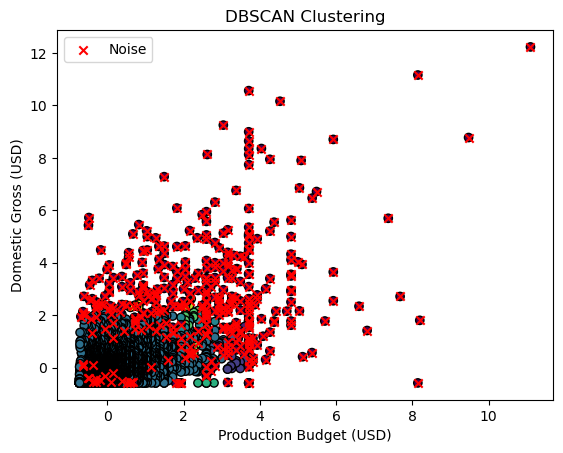

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

# Load the dataset

mydata = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Top Movies (Cleaned Data).csv')
df = pd.DataFrame(mydata)

# Data Insights
print("===================================# VIEWING AND INSPECTING DATA =================================== \n")
print("---------- # FIRST 5 ROWS # -----------\n",df.head())
print("---------- #  LAST 5 ROWS# # -----------\n",df.tail())
print("---------- #  SUMMARY OF THE DATAFRAME# # -----------\n",df.info())
print("---------- #  STATISTICS OF NUMERICAL COLUMNS# # -----------\n",df.describe())
print("---------- #  SHAPE OF THE DATAFRAME# # -----------\n",df.shape)
print("---------- #  LIST OF COLUMN NAMES# # -----------\n",df.columns)
print("---------- #  DATA TYPES OF COLUMNS# # -----------\n",df.dtypes)

# Data Handling

object_columns =df.select_dtypes(include=['object']).columns
int_columns =df.select_dtypes(include=['int64']).columns
float_columns =df.select_dtypes(include=['float64']).columns

print("===================================# DATA HANDLING # =================================== \n")
print("---------- # NULL VALUE INFO # -----------\n",df.isnull().sum())
for col in object_columns:
    df[col] = df[col].fillna("No Data")

for col in int_columns:
    df[col] = df[col].fillna(df[col].mean())
for col in float_columns:
    df[col] = df[col].fillna(df[col].max())

print("---------- # NULL VALUE INFO # -----------\n",df.isnull().sum())

# Data Encoding

print("---------- # ENCODING DATA # -----------\n")
object_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()

for col in object_columns:
    df[col] = encoder.fit_transform(df[col])
    print("Encoded Column >>> ",col)
print("---------- # ENCODED DATA # -----------\n",df.head())

# Features for Clustering 

features = ['Production Budget (USD)','Domestic Gross (USD)','Worldwide Gross (USD)']

#Scale the Data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

print(scaled_data)

# DBSCAN Clustering

dbscan=DBSCAN(eps=0.3,min_samples=5)
Labels =dbscan.fit_predict(scaled_data)
df['clusters']=Labels
print(df.head())

# Plot clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=Labels, cmap='viridis', edgecolor='k')

# Mark noise points (-1 label)
noise_points = scaled_data[Labels == -1]
plt.scatter(noise_points[:, 0], noise_points[:, 1], color='red', marker='x', label='Noise')

plt.title("DBSCAN Clustering")
plt.xlabel("Production Budget (USD)")
plt.ylabel("Domestic Gross (USD)")
plt.legend()
plt.show()


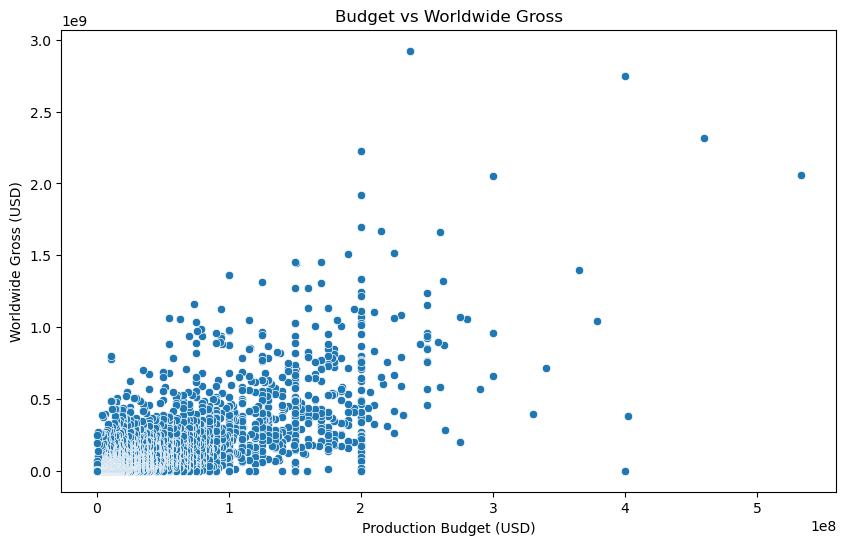

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Production Budget (USD)'], y=df['Worldwide Gross (USD)'])
plt.xlabel("Production Budget (USD)")
plt.ylabel("Worldwide Gross (USD)")
plt.title("Budget vs Worldwide Gross")
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
X = df.drop(columns=["Worldwide Gross (USD)"])
y = df["Worldwide Gross (USD)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = model.score(X_test, y_test)

In [12]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")
print(f"AccuracyL: {accuracy}")

MAE: 1080909.490692542
MSE: 109907846325934.78
R2 Score: 0.9964734024806116
AccuracyL: 0.9964734024806116
